In [1]:
# Import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the data file

dftrain = pd.read_csv("train.csv")
dftest = pd.read_csv("test.csv")

In [3]:
# Glimpse od the data

dftrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Basic analysis

dftrain.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#How much missing data do we have

dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Identifying the important features





Text(0.5, 1.0, 'Survival probability by Age')

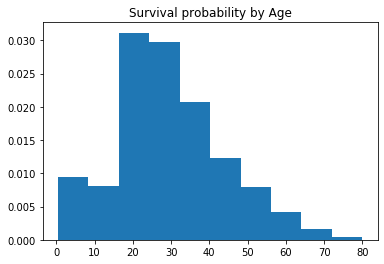

In [6]:
# Age analysis

age = dftrain[["Survived","Age"]]
age = age.dropna()

x_array = age.Age

plt.hist(x_array, density = True)
plt.title("Survival probability by Age")

Text(0.5, 1.0, 'Survival by sex')

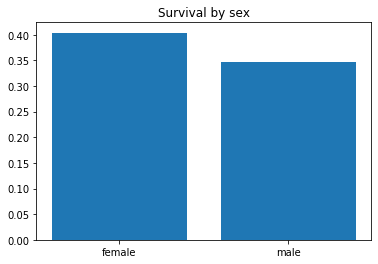

In [7]:
# Gender analysis

gender = dftrain.groupby("Sex")["Survived"].sum().reset_index()
cgender = dftrain["Sex"].value_counts(sort = False)
gender = gender.assign(total = cgender.values)
perct = gender.Survived / gender.total
gender = gender.assign(perct = perct.values)
gender

x_array = np.array(gender.Sex)
y_array = np.array(gender.perct)

plt.bar(x_array,y_array)
plt.title("Survival by sex")

Text(0.5, 1.0, 'Survival by Classticket')

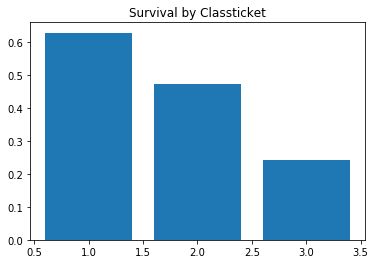

In [8]:
# Class analysis

classt = dftrain.groupby("Pclass")["Survived"].sum().reset_index()
cclasst = dftrain["Pclass"].value_counts(sort = False)
classt = classt.assign(total = cclasst.values)
perct3 = classt.Survived / classt.total
classt = classt.assign(perct = perct3.values)

x_array = np.array(classt.Pclass)
y_array = np.array(classt.perct)

plt.bar(x_array,y_array)
plt.title("Survival by Classticket")

Text(0.5, 1.0, 'Survival by embarking location')

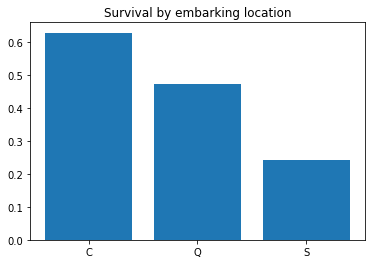

In [9]:
# Embark location class

embark = dftrain.groupby("Embarked")["Survived"].sum().reset_index()
cembark = dftrain["Embarked"].value_counts(sort = False)
embark = embark.assign(total = cembark.values)
perct4 = embark.Survived / embark.total
embark = embark.assign(perct = perct4.values)
embark

x_array = np.array(embark.Embarked)
y_array = np.array(classt.perct)

plt.bar(x_array,y_array)
plt.title("Survival by embarking location")


C:\anaconda\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 1, 'Survival vs number of relatives')

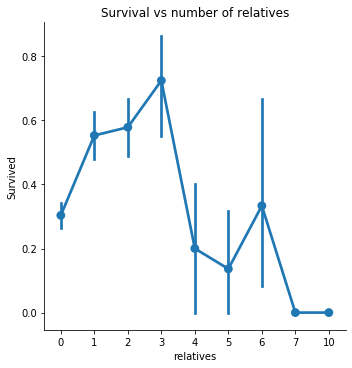

In [10]:
#Family and friends influence

dftrain["relatives"] = dftrain["SibSp"] + dftrain["Parch"]

sns.factorplot(x = "relatives", y = "Survived", data = dftrain)
plt.title("Survival vs number of relatives")

    

Preparing data for machine learning

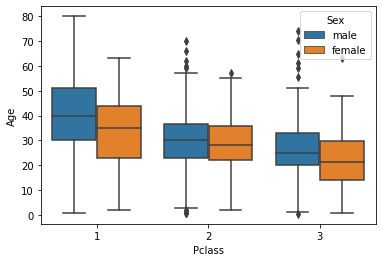

In [11]:
# Preparing age

##Filling missing data

sns.boxplot( x = "Pclass", y = "Age", hue = "Sex", data = dftrain)

data = [dftrain,dftest]

for i in data:
    i.loc[(i["Pclass"] == 1),"Age"] = i["Age"].fillna(37)
    i.loc[(i["Pclass"] == 2),"Age"] = i["Age"].fillna(30)
    i.loc[(i["Pclass"] == 3),"Age"] = i["Age"].fillna(25)

## Creating Age Groups

for i in data:
    cat = pd.cut(i.Age, bins = [0,12,18,25,35,45,60,81], labels = ["children","teenagers","yadults","adults1","adults2","adults3","elderly"])
    i.insert(5,"Age_Group",cat)
    dic = {"children" : 1,"teenagers": 2,"yadults" : 3,"adults1" : 4,"adults2" : 5,"adults3" : 6,"elderly" : 7}
    i["Age_Group"].replace(dic, inplace = True)


In [12]:
# Preparing Gender

for i in data:
    i["Sex"].replace({"male" : 0, "female" : 1}, inplace = True)

In [13]:
# Preparing Embark location

## Filling the missing data

for i in data:
    i["Embarked"].fillna("S", inplace = True)
    
## Converting data

for i in data:
    chv = {"S" : 1, "C" : 2, "Q" : 3}
    i["Embarked"].replace(chv, inplace = True)
   

In [14]:
# Preparing relatives

dftest["relatives"] = dftest["SibSp"] + dftest["Parch"]

for i in data:
    i.loc[i["relatives"] > 0,"relatives"] = 1
 



In [15]:
# last changes

for i in data:
    i.drop(["Name"], axis =1, inplace = True)
    i.drop(["Age"], axis =1, inplace = True)
    i.drop(["Ticket"], axis =1, inplace = True)
    i.drop(["Fare"], axis = 1, inplace = True)
    i.drop(["Cabin"], axis = 1, inplace = True)
    i.Embarked.astype(int)
 


In [16]:
# Are we ready?

dftrain.head()


,PassengerId,Survived,Pclass,Sex,Age_Group,SibSp,Parch,Embarked,relatives
0,1,0,3,0,3,1,0,1,1
1,2,1,1,1,5,1,0,2,1
2,3,1,3,1,4,0,0,1,0
3,4,1,1,1,4,1,0,1,1
4,5,0,3,0,4,0,0,1,0


Creating ML Model

In [17]:
# Importing packages

from sklearn.ensemble import RandomForestClassifier


In [18]:
# Executing the model

X_train = dftrain.drop(["Survived"], axis = 1)
X_train.drop(["PassengerId"], axis = 1, inplace = True)
y_train = dftrain["Survived"]
X_test = dftest.drop(["PassengerId"], axis = 1)

random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train,y_train)

y_prediction = random_forest.predict(X_test)
random_forest.score(X_train,y_train)

0.8799102132435466

In [19]:
# Model analysis

pd.DataFrame({"features":X_train.columns, "Relative Importance":random_forest.feature_importances_})


,features,Relative Importance
0,Pclass,0.170565
1,Sex,0.395440
2,Age_Group,0.193768
3,SibSp,0.083132
4,Parch,0.060179
5,Embarked,0.063938
6,relatives,0.032979


In [25]:
# Export file for evaluation at kaggle

my_submission = pd.DataFrame({"PassengerId":dftest["PassengerId"],"Survived":y_prediction})
my_submission.to_csv("my_submission.csv", index = False)

In [22]:
my_submission

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64